# MultiREx
## [Planetary transmission spectra generator](https://github.com/D4san/MultiREx-public)

## Quickstart
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pylar/blob/main/tutorials/pylar-quickstart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex

In [14]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

First we can create the components of a planetary system.

In [5]:
star=mrex.Star(temperature=5777,radius=1,mass=1)
planet=mrex.Planet(radius=1,mass=1)
system=mrex.System(star=star,planet=planet,sma=1)


We can create an atmosphere with a fill gas and other molecules dictionary specifying a range or value of log10 mixing ratio for each molecule.

In [6]:
atmo=mrex.Atmosphere(temperature=288,base_pressure=1e5,top_pressure=1,
                     fill_gas="N2",composition={"CO2":(-4,-1),"H2O":(-4,-2),
                                                "CH4":(-6,-3),"O3":-6})

system.planet.set_atmosphere(atmo)

Now we can initialize our model and use the other features of multirex.

In [8]:
system.make_tm()

For example we can visualize the spectrum of the planet. But first we must define a range of wavenumbers, we can use the `wavenumber_grid` function to do this.

In [9]:
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)

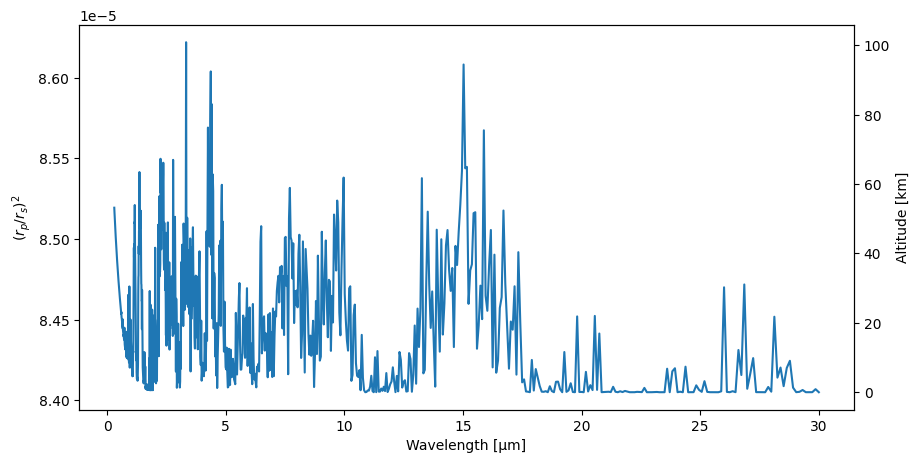

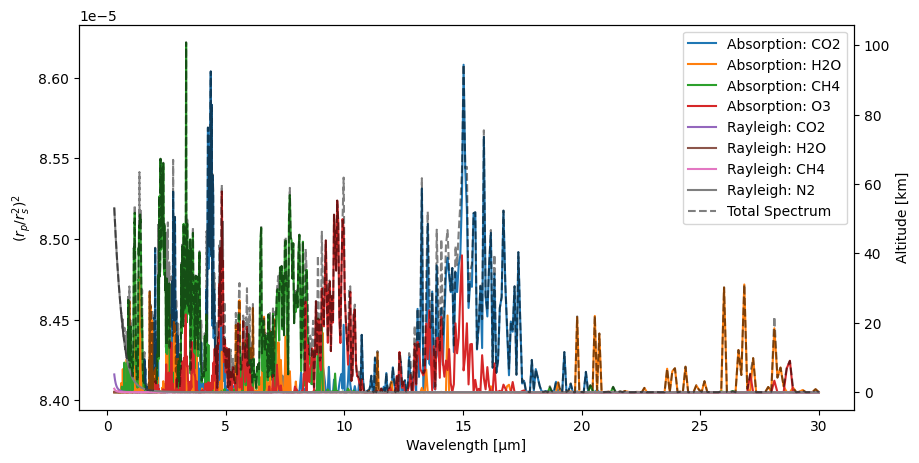

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='Wavelength [μm]', ylabel='$(r_p/r_s^2)^2$'>)

In [19]:
system.plot_spectrum(wn_grid=wn,showfig=True)
system.plot_contributions(wn_grid=wn,showfig=True)

Now we can generate a dataset spectra varying the parameters who we define as a range, and addionally we can add noise based on the signal to noise ratio to generate a set of observations.

Optionally we can add a label based on the presence of a molecule in the atmosphere.


In [34]:
result = system.explore_multiverse(wn_grid=wn,snr=10,n_universes=10, labels="O3",
                                        n_observations=1000,spectra=True,observations=True,header=True)

Exploring universes: 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]


Generating observations for 10 spectra...


In [38]:
result['spectra']

,sma,seed,p_radius,p_mass,p_seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
6,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
7,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
8,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


In [42]:
result.keys()

dict_keys(['spectra', 'observations'])

In [43]:
result['observations']

,noise,SNR,sma,seed,p_radius,p_mass,p_seed,atm temperature,atm base_pressure,atm top_pressure,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1.718834e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1.718834e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1.718834e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1.718834e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1.718834e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.265210e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9996,2.265210e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000085,0.000085
9997,2.265210e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086
9998,2.265210e-07,10,1,None,1,1,None,288,100000.0,1,...,0.000086,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


In [44]:
spectra = result['spectra']
obs = result['observations']

In [45]:
obs["atm CO2"].value_counts()

atm CO2
-3.408987742146222     1000
-2.052081451168328     1000
-1.3616856011912564    1000
-1.010139343337006     1000
-2.163181465340889     1000
-1.6659263020323878    1000
-3.274977492578971     1000
-1.3830070132708872    1000
-3.1898957504633563    1000
-1.866358715924878     1000
Name: count, dtype: int64

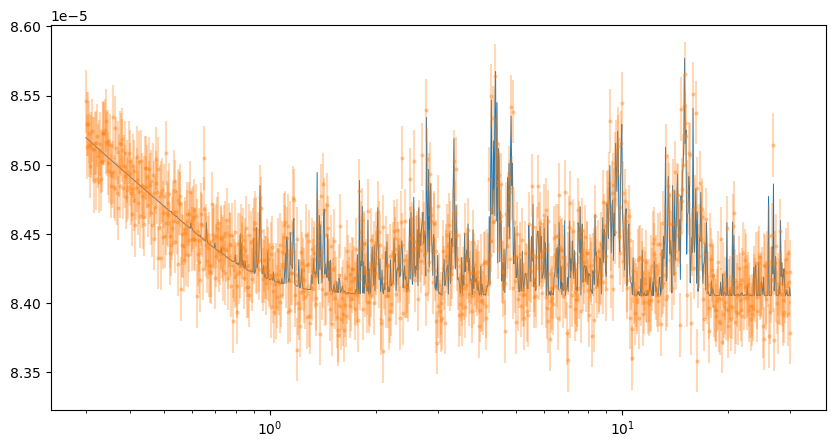

In [46]:
##
plt.figure(figsize=(10,5))
plt.plot(spectra.iloc[0,-1000:],label="True Spectrum",linewidth=0.7)
plt.errorbar(x=1e4/wn,y=obs.iloc[0,-1000:],yerr=(max(obs.iloc[1,-1000:])-min(obs.iloc[1,-1000:]))/obs.loc[0,"SNR"]
             ,label="Observed Spectrum",fmt="o",markersize=2,alpha=0.3)
plt.xscale("log")